
### Banknote Clustering with K-Means (V1 and V2)
In this notebook, we focus on clustering the banknote dataset using only two features: **V1** (variance) and **V2** (skewness). We apply K-Means clustering.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import accuracy_score


# Load the dataset
dt = pd.read_csv('BankNotes_fulldata.arff')

# Extract V1 and V2
taken_data = dt[['V1', 'V2']]
truth = dt['Class (target)']  # This is the ground truth for comparison

# Min-Max Normalization function
def normalization(arr):
    norm = []
    for i in range(arr.shape[1]):
        norm.append((arr[:, i] - arr[:, i].min()) / (arr[:, i].max() - arr[:, i].min()))
    return np.array(norm).T

# Apply normalization to V1 and V2
norm = normalization(taken_data.values)

# Reshape function to match data structure (if necessary)
def reshaped(arr):
    return np.array(arr)

norm = reshaped(norm)

# Apply K-Means clustering to the min-max normalized data (V1 and V2 only)
kmeans = KMeans(n_clusters=2)
km_res = kmeans.fit(norm)
labels = km_res.labels_


In [2]:
# Function to match labels with ground truth
def match_labels(ground_truth, kmeans_labels):
    unique_labels = np.unique(ground_truth)
    
    # Calculate the accuracy for both possible label configurations
    acc1 = accuracy_score(ground_truth, kmeans_labels)
    acc2 = accuracy_score(ground_truth, abs(kmeans_labels-1))  # Swap labels (0 <-> 1)
    kmeans_labels_matched=kmeans_labels
    # If the second configuration is better, swap the labels
    if acc2 > acc1:
        kmeans_labels_matched = abs(kmeans_labels-1)


    # Now, you can evaluate the accuracy correctly
    accuracy = accuracy_score(ground_truth, kmeans_labels_matched)
    return accuracy


def K_MeansAll(data, n_clusters, ground_truth): #This function will apply K-Means clustering and calculate accuracy with the ground truth.
    kmeans = KMeans(n_clusters=n_clusters)
    km_res=kmeans.fit(data)
    accuracyR = match_labels(ground_truth, km_res.labels_)
    return accuracyR

In [10]:
def reverse_min_max_norm(norm_data, X_min, X_max):
    """
    Reverses the Min-Max normalization to get back the original values.
    
    Parameters:
    - norm_data: Normalized data that you want to reverse.
    - X_min: Minimum value of the original data before normalization.
    - X_max: Maximum value of the original data before normalization.
    
    Returns:
    - Original data restored from the normalized values.
    """
    original_data = norm_data * (X_max - X_min) + X_min
    return original_data

In [33]:
cluster_reshaped=[]
centroids=km_res.cluster_centers_
for i in range(len(centroids)):
    cluster_reshaped.append(reverse_min_max_norm(centroids[:,i], np.min(taken_data.values[:,i]), np.max(taken_data.values[:,i])))



In [38]:
cluster_reshaped

[array([ 2.29932635, -1.91746274]), array([ 4.88024249, -1.80546462])]

4.880242490196078 2.2993263490196085
-1.8054646177924223 -1.9174627413509064


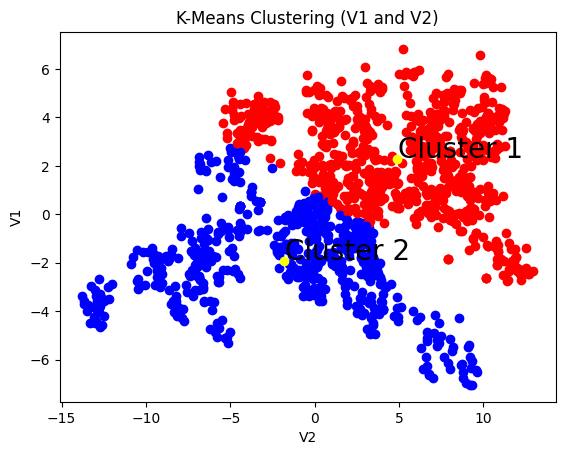

In [44]:
# Plot the clustering result (V1 vs V2)
plt.xlabel('V2')
plt.ylabel('V1')
colors = ['red', 'blue']

for i in range(taken_data.shape[0]):
    plt.scatter(taken_data.iloc[i, 1], taken_data.iloc[i, 0], color=colors[labels[i]])
for i in range(len(cluster_reshaped)):
    print(cluster_reshaped[1][i], cluster_reshaped[0][i])
    plt.scatter(cluster_reshaped[1][i], cluster_reshaped[0][i], color='yellow')
    plt.text(cluster_reshaped[1][i]+.05, cluster_reshaped[0][i]+.05,f'Cluster {i+1}', color='Black', fontsize=20)

    
plt.title("K-Means Clustering (V1 and V2)")
plt.show()


While clustering, the clustering labels may be different due to the random initialization of K-Means. Therefore, creating a function to match labels with the ground truth can help us to have better comparision with the ground truth.

In [12]:
ground_truth=truth-1
kmeans_labels = km_res.labels_  # K-Means labels
# Apply the label matching function
accuracy = match_labels(ground_truth, kmeans_labels) #The matching function also returns the accuracy of the clustering.
print(f'Accuracy after label matching: {accuracy * 100:.2f}%')

Accuracy after label matching: 87.32%


**Running difference time to check for stability.**

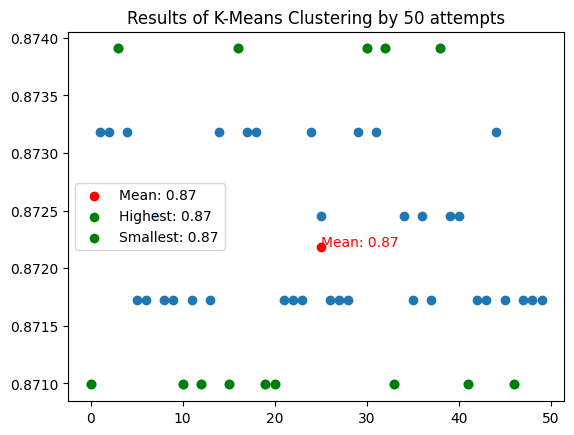

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Run K-Means clustering 50 times and store results
res = []
for i in range(50):
    res.append(K_MeansAll(norm, 2, ground_truth))

# Convert results to numpy array
res = np.array(res)
mean = res.mean()
highests = res.max()
smallest = res.min()

# Identify the positions of the highest and smallest accuracies
highests_pos = np.where(res == highests)[0]
smallests_pos = np.where(res == smallest)[0]

# Plot the results
plt.scatter(list(range(50)), res)  # All K-Means attempts

# Plot the mean, highest, and smallest points
plt.scatter(25, mean, color='red', label=f'Mean: {mean:.2f}')  # Mean
plt.scatter(highests_pos, [highests]*len(highests_pos), color='green', label=f'Highest: {highests:.2f}')  # Max
plt.scatter(smallests_pos, [smallest]*len(smallests_pos), color='green', label=f'Smallest: {smallest:.2f}')  # Min

# Add labels
plt.text(25, mean, f'Mean: {mean:.2f}', color='red')

# Add a title and show the plot
plt.title('Results of K-Means Clustering by 50 attempts')
plt.legend()
plt.show()


As the results of K-Means clustering, we can see that the highest accuracy achieved is 87,40%. Also, we assume that the results of K-Means clustering are very stable with the score $$\approx 87\%$$